# Thesis: Classification Problem
Let's do a classification problem.
Can a program that correctly classifies a flower?


In [46]:
# Import libraries
import copy
import time
# library for math
import numpy as np
# library for math
import pandas as pd
# library for graphs
import matplotlib.pyplot as plt
# library for stats and stats visuals
import seaborn as sns
# Machine Learning in Python
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Import required libraries for model evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay



## Set up the MLflow experiment tracking

Extending the MLflow autologging capabilities, autologging works by automatically capturing the values of input parameters and output metrics of a machine learning model as it is being trained. This information is then logged to the workspace, where it can be accessed and visualized using the MLflow APIs or the corresponding experiment in the workspace. 

In [47]:
# # Set up MLflow for experiment tracking
# import mlflow
# from mlflow import MlflowClient
# from mlflow.models import Model
# from mlflow.models.signature import ModelSignature

# """
# Define Variables
# """

# EXPERIMENT_NAME = "Test"  # MLflow experiment name

# """
# ML Flow: Machine Learning

# Autologging in Microsoft Fabric extends the MLflow autologging capabilities by automatically capturing the values of input parameters and output metrics of a machine learning model as it is being trained. This information is then logged to the workspace, where it can be accessed and visualized using the MLflow APIs or the corresponding experiment in the workspace. To learn more about autologging, see [Autologging in Microsoft Fabric](https://aka.ms/fabric-autologging).
# """

# mlflow.set_experiment(EXPERIMENT_NAME)
# mlflow.autolog(disable=True)  # Disable MLflow autologging



In [48]:
# Record the start time
start_time = time.time()

## Dataset

### Retrieve Data

In [49]:
iris = load_iris()
X = iris.data
y = iris.target

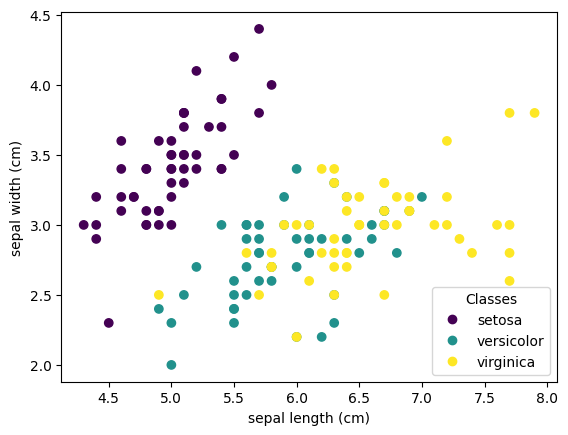

In [50]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

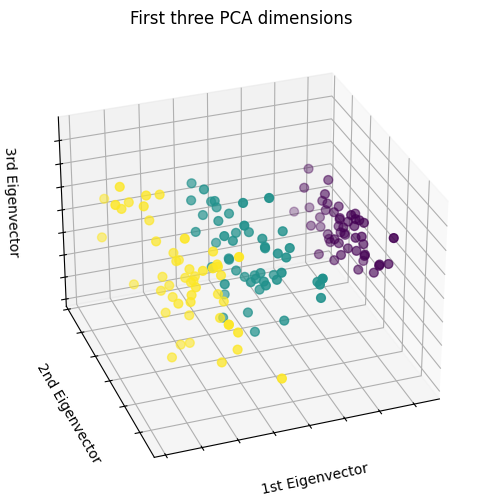

In [51]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

### Data Cleaning

In [52]:
def clean_data(X):
    # Rename column 0 to 'sepal_length'
    X = X.rename(columns={0: 'sepal_length'})
    # Rename column 1 to 'sepal_width'
    X = X.rename(columns={1: 'sepal_width'})
    # Rename column 2 to 'petal_length'
    X = X.rename(columns={2: 'petal_length'})
    # Rename column 3 to 'petal_width'
    X = X.rename(columns={3: 'petal_width'})
    return X

# Loaded variable 'X' from kernel state
X = pd.DataFrame(X.tolist() if len(X.shape) > 2 else X)

X_clean = clean_data(X.copy())
X_clean.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
def clean_data(y):
    # Rename column 0 to 'species'
    y = y.rename(columns={0: 'species'})
    return y

# Loaded variable 'y' from kernel state
y = pd.DataFrame(y.tolist() if len(y.shape) > 2 else y)

y_clean = clean_data(y.copy())
y_clean.head()

,species
0,0
1,0
2,0
3,0
4,0


In [54]:
X = X_clean
y = y_clean

## Model training and evaluation

### Prepare training and test datasets

We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable.

Now we allocate the data so the model can be tested and trained.

In [55]:
# X_train: Features of the training set
# X_test: Features of the testing set
# y_train: Labels of the training set
# y_test: Labels of the testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


### Decision Tree Method

Decision trees can be used to classify the type of flower in the iris dataset.
The iris dataset is a commonly used dataset in machine learning, and decision trees are a popular algorithm for classification tasks.
Decision trees work by recursively splitting the dataset based on features to create a tree-like structure. Each leaf node represents a class label, in this case, the type of iris flower (setosa, versicolor, or virginica). 
The decision tree uses features such as sepal length, sepal width, petal length, and petal width to make decisions and classify the flowers into different types. 
You can use a machine learning library like scikit-learn in Python to implement and train a decision tree on the iris dataset for classification purposes.

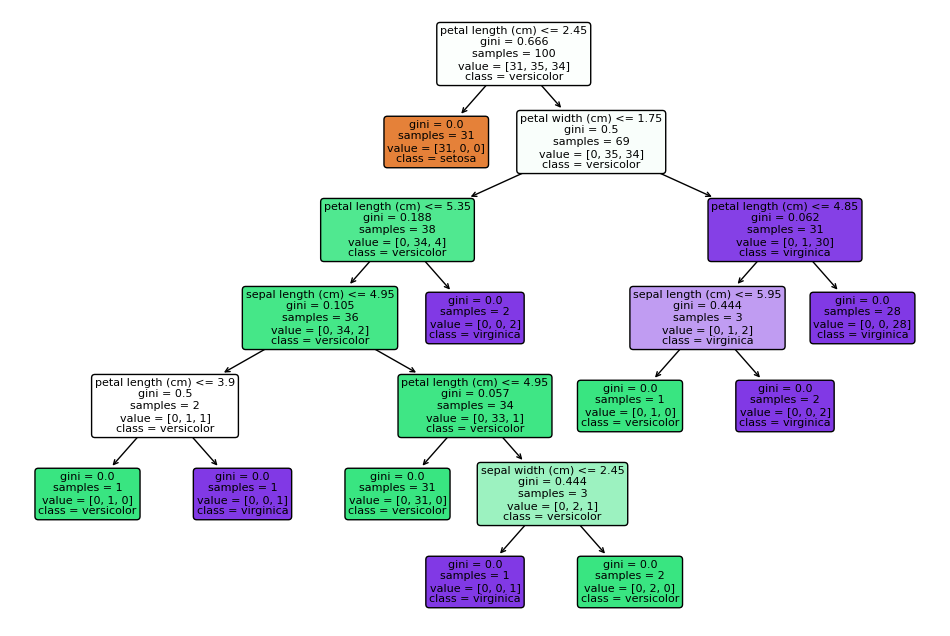

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [56]:
clf = tree.DecisionTreeClassifier()
# Train the model using the training set
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

# Make predictions on the testing set
predictions = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Display additional metrics like classification report and confusion matrix
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)

Accuracy Display

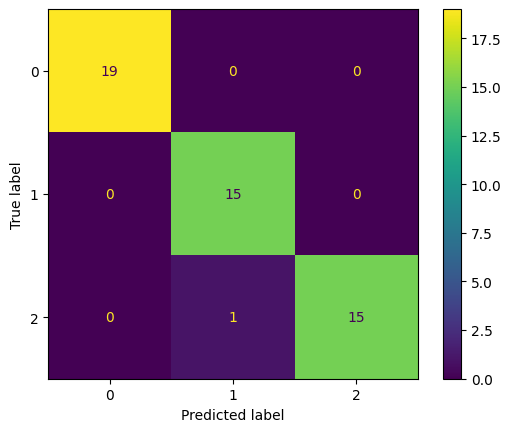

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [58]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


# hyperparameter Tuning

1. **criterion**: The function to measure the quality of a split. It can be either "gini" for the Gini impurity or "entropy" for the information gain.

2. **splitter**: The strategy used to choose the split at each node. It can be "best" to choose the best split or "random" to choose the best random split.

3. **max_depth**: The maximum depth of the tree. It controls the maximum depth of the tree to avoid overfitting.

4. **min_samples_split**: The minimum number of samples required to split an internal node.

5. **min_samples_leaf**: The minimum number of samples required to be at a leaf node.

6. **max_features**: The number of features to consider when looking for the best split.

# New data

In [59]:
# Create a shallow copy of the original DataFrame
copied_df = copy.copy(X_test)

"""
Create Random data 
"""
def clean_data(copied_df):
    # Select column: 'sepal_length'
    copied_df['sepal_length'] = np.random.uniform(low=1.0, high=100.0, size=len(copied_df))  # random values between 1 and 100
    # Select column: 'sepal_width'
    copied_df['sepal_width'] = np.random.uniform(low=1.0, high=100.0, size=len(copied_df))  # random values between 1 and 100
    # Select column: 'petal_length'
    copied_df['petal_length'] = np.random.uniform(low=1.0, high=100.0, size=len(copied_df))  # random values between 1 and 100
    # Select column: 'petal_width'
    copied_df['petal_width'] = np.random.uniform(low=1.0, high=100.0, size=len(copied_df))  # random values between 1 and 100
    # Round columns 'sepal_length', 'sepal_width' and 2 other columns (Number of decimals: 1)
    copied_df = copied_df.round({'sepal_length': 1, 'sepal_width': 1, 'petal_length': 1, 'petal_width': 1})
    return copied_df

copied_df_clean = clean_data(copied_df.copy())
copied_df_clean.head()


,sepal_length,sepal_width,petal_length,petal_width
73,13.2,56.7,78.4,23.3
18,82.1,92.2,39.3,34.5
118,52.1,16.4,42.1,6.4
78,60.6,53.2,44.4,67.6
76,21.5,85.2,82.3,38.7


In [60]:
new_data = copied_df_clean

## Evaluation

In [61]:
# Assuming 'new_data' contains the features of new instances
new_predictions = clf.predict(new_data)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, new_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.32


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        15
           2       0.32      1.00      0.48        16

    accuracy                           0.32        50
   macro avg       0.11      0.33      0.16        50
weighted avg       0.10      0.32      0.16        50



c:\Users\OITRICKENNEN\PycharmProjects\Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OITRICKENNEN\PycharmProjects\Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OITRICKENNEN\PycharmProjects\Classifier\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

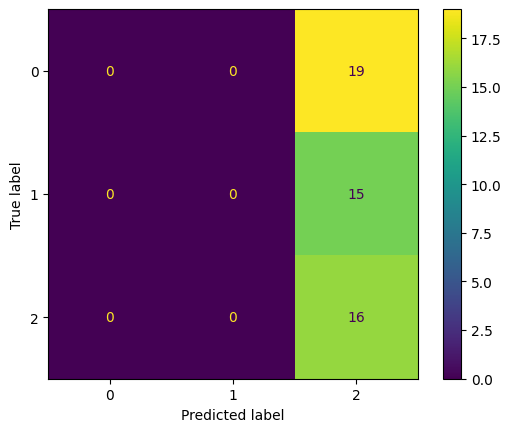

In [62]:
# Display additional metrics like classification report and confusion matrix
print(classification_report(y_test, new_predictions))
cm = confusion_matrix(y_test, new_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# End Log

In [63]:
# Record the end time
end_time = time.time()

# Calculate the total execution time
total_time = end_time - start_time

# Display the DataFrame and total execution time
print(f"\nTotal execution time: {total_time} seconds")


Total execution time: 6.313477277755737 seconds
